In [30]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score
import pandas as pd

In [19]:
x = np.array([3, 3, 4, 4, 5, 6, 7, 7, 8, 9, 1, 2, 2, 3, 4, 5, 5, 6, 7, 7])
y = np.array([1, 2, 2, 3, 3, 4, 4, 6, 5, 7, 3, 4, 5, 6, 6, 7, 8, 8, 8, 9])

1. Based only on the features, how many clusters would you intuitively expect?

2. Cluster the dataset using 𝑘-means with 𝑘 “ 2, 3, 4.

3. Do the resulting clusterings fit to those intuitively expected?

4. Which properties of 𝑘-means are responsible for the result?

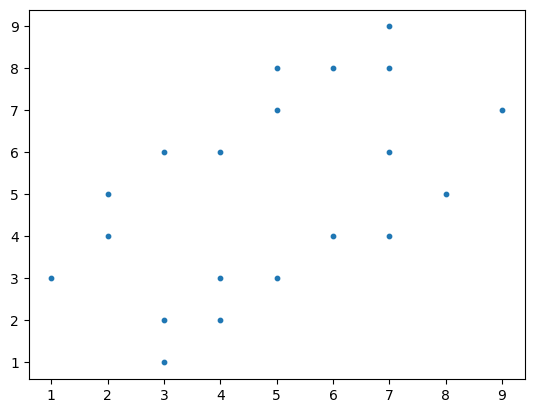

In [20]:

plt.scatter(x, y, s=10)


In [21]:
kmeans_pp = KMeans(
    n_clusters=2, # find 3 clusters
    random_state=42, # make experiments replicable
    n_init=200, # find the best clustering out of 20 tries with different initialization
    init='k-means++', # use k-means++ initialization
    max_iter=300, tol=0.0001)

In [22]:
ARR = np.array(list(zip(x, y)))

In [23]:
cluster_assignments=kmeans_pp.fit_predict(ARR)

In [24]:
def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

In [25]:
k_means_report(kmeans_pp)

k-means 
 * has seen 2 features,
 * used 3 iterations, and 
 * resulted in an inertia of 81.01010101010101.


In [26]:
kmeans_pp.cluster_centers_

array([[6.45454545, 6.54545455],
       [3.        , 3.22222222]])

In [27]:
cluster_assignments

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

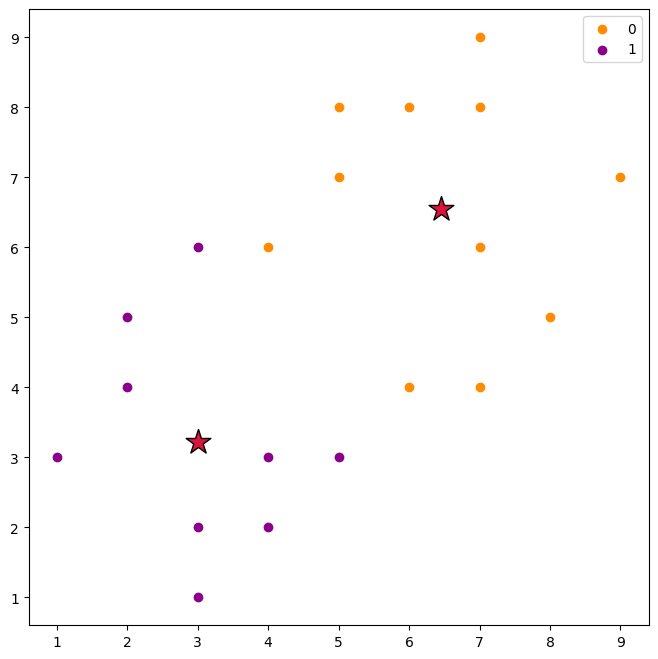

In [28]:
colors=['darkorange', 'darkmagenta', 'dodgerblue']

def print_clustering(X, kmeans, cluster_assignments):
    plt.figure(figsize=(8, 8))

#    for i in range(0,len(np.unique(cluster_assignments))):
    for i in np.unique(cluster_assignments):
        X_sub=X[cluster_assignments==i, :]
        plt.scatter(X_sub[:, 0], X_sub[:, 1], c=colors[i], label=i)
    
    plt.scatter(
        kmeans.cluster_centers_[:, 0], 
        kmeans.cluster_centers_[:, 1],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
print_clustering(ARR, kmeans_pp, cluster_assignments)

In [31]:
crosstab=pd.crosstab(y, cluster_assignments)
crosstab.index.name="y"
crosstab.columns.name="clusters"
crosstab

clusters,0,1
y,,
1,0,1
2,0,2
3,0,3
4,2,1
5,1,1
6,2,1
7,2,0
8,3,0
9,1,0
